Table of contents

1. Create bare-bones minerva model

2. Replicate original paper finding (requires better interface)

3. Create rhythm/tone experiment with fixed
    - rhythm/tone split
    - number participants
    - participant stimuli

4. Make experiment configurable

5. Run a bazillion experiments

# Bare-bones Minerva2 model

In [1]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Calibri"
matplotlib.rcParams['font.size'] = 14

In [4]:
def add_noise_2d(arr, ratio):
    rands = np.random.rand(arr.shape[0] * arr.shape[1])
    condition = rands < ratio
    mask = np.flatnonzero(condition)
    f = arr.flatten()
    f[mask] *= -1
    return f.reshape(arr.shape)

## The Model (v0.1)

In [5]:
from minerva2 import Minerva2

## Try it out with some ZERO traces

In [6]:
len([val for val in np.unique(np.array((1,0,-1,1, 1, 1, 1, 0))) if val not in (-1, 0, 1)])

0

In [7]:
model1_fpt = 10

In [8]:
model1 = Minerva2(model1_fpt)

In [9]:
for _ in range(10):
    rand_trace = np.zeros(model1_fpt)
    model1.add_trace(rand_trace)

In [10]:
model1.model

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Let's create a random probe to test

In [11]:
probe1 = np.random.randint(-1, 2, model1_fpt)
probe1

array([-1, -1,  1,  1, -1, -1, -1,  1,  1,  1])

In [12]:
model1.get_echo_intensity(probe1, return_all=True)

(0.0,
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [13]:
model1.pretty_print_echo_intensity(probe1)

PROBE: [-1, -1, 1, 1, -1, -1, -1, 1, 1, 1]
TRACE 0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 4: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 5: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 7: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 8: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 9: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
--------------------------------------------------------------------------------
                                              

Blank memory means a blank response! Looking good so far.

## Now test with random traces

In [14]:
model2_fpt = 8

In [15]:
model2 = Minerva2(model2_fpt)

In [16]:
for _ in range(12):
    rand_trace = np.random.randint(-1, 2, model2_fpt)
    model2.add_trace(rand_trace)

In [17]:
model2.model

array([[ 1,  0,  1, -1,  0, -1,  1, -1],
       [ 0,  1,  0,  0, -1,  1,  0,  0],
       [ 0,  0, -1,  1, -1,  1,  1, -1],
       [-1,  0, -1, -1,  0,  1, -1, -1],
       [ 0,  0, -1, -1, -1,  1,  1,  0],
       [ 1,  1,  1, -1,  0,  1,  0,  0],
       [-1,  1, -1,  0, -1, -1,  0, -1],
       [-1,  1,  0,  1,  0, -1,  0,  1],
       [ 1, -1,  0,  1, -1,  0, -1,  0],
       [-1,  0,  1,  0, -1,  0,  0,  1],
       [ 1,  0, -1,  0,  1,  0, -1, -1],
       [ 1, -1,  0,  1,  1,  1,  1,  1]])

And a random test probe...

In [18]:
probe2 = np.random.randint(-1, 2, model2_fpt)
probe2

array([-1,  0,  1,  1, -1, -1,  0, -1])

In [19]:
model2.get_echo_intensity(probe2, return_all=True)

(-0.0009765625,
 [0.001953125,
  0.0,
  0.001953125,
  -0.001953125,
  -0.015625,
  -0.015625,
  0.052734375,
  0.015625,
  0.001953125,
  0.015625,
  -0.015625,
  -0.052734375],
 [0.125,
  0.0,
  0.125,
  -0.125,
  -0.25,
  -0.25,
  0.375,
  0.25,
  0.125,
  0.25,
  -0.25,
  -0.375])

In [20]:
model2.pretty_print_echo_intensity(probe2)

PROBE: [-1, 0, 1, 1, -1, -1, 0, -1]
TRACE 0: [1, 0, 1, -1, 0, -1, 1, -1] ->  0.125^3 =    0.002
TRACE 1: [0, 1, 0, 0, -1, 1, 0, 0] ->  0.000^3 =    0.000
TRACE 2: [0, 0, -1, 1, -1, 1, 1, -1] ->  0.125^3 =    0.002
TRACE 3: [-1, 0, -1, -1, 0, 1, -1, -1] -> -0.125^3 =   -0.002
TRACE 4: [0, 0, -1, -1, -1, 1, 1, 0] -> -0.250^3 =   -0.016
TRACE 5: [1, 1, 1, -1, 0, 1, 0, 0] -> -0.250^3 =   -0.016
TRACE 6: [-1, 1, -1, 0, -1, -1, 0, -1] ->  0.375^3 =    0.053
TRACE 7: [-1, 1, 0, 1, 0, -1, 0, 1] ->  0.250^3 =    0.016
TRACE 8: [1, -1, 0, 1, -1, 0, -1, 0] ->  0.125^3 =    0.002
TRACE 9: [-1, 0, 1, 0, -1, 0, 0, 1] ->  0.250^3 =    0.016
TRACE 10: [1, 0, -1, 0, 1, 0, -1, -1] -> -0.250^3 =   -0.016
TRACE 11: [1, -1, 0, 1, 1, 1, 1, 1] -> -0.375^3 =   -0.053
--------------------------------------------------------------------------------
                                                                          -0.001


### Do this a bunch to see what random traces and probes produce

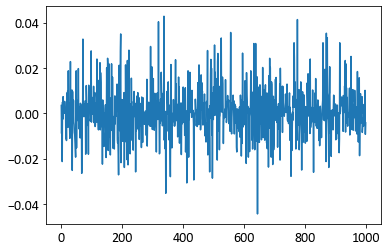

In [21]:
intensities = []
for i in range(1000):
    probe2 = np.random.randint(-1, 2, model2_fpt)
    intensities.append(model2.get_echo_intensity(probe2))
plt.plot(intensities)

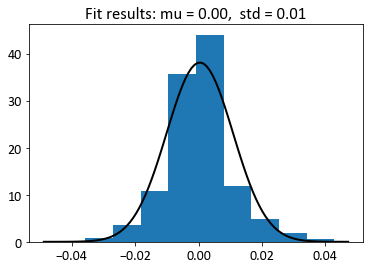

In [22]:
from scipy.stats import norm

mu, std = norm.fit(intensities)

plt.hist(intensities, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Good enough.

# Mimic experiment 1

Participants received partial features (rhythm/tone) during study, then at test were given a full song.

We will simulate this by creating a list of random probes, `R`.

Memory traces will be added which contain zeros, and some subset of `R`.

We will be comparing trace/probe overlap amount on echo intensity.

In [23]:
model3_fpt = 10
model3_prototypes = 10
model3_rhythm_tone_ratio = 0.7
model3_noise_ratio = 0.5

In [24]:
model3 = Minerva2(model3_fpt)

## Make some random probes

In [25]:
Ps = np.random.randint(-1, 2, (model3_prototypes, model3_fpt))
Ps.shape

(10, 10)

In [26]:
Ps

array([[ 1,  1,  0,  1,  0,  0, -1, -1, -1,  1],
       [-1,  0, -1,  0, -1, -1,  1,  1, -1,  0],
       [ 1,  1,  0, -1,  1, -1,  0, -1,  1,  1],
       [-1,  1, -1,  1, -1,  0,  1,  0,  1, -1],
       [-1, -1,  1,  0,  0, -1, -1,  0, -1,  1],
       [ 0, -1, -1,  1, -1, -1,  0, -1,  1,  1],
       [ 1, -1,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 1, -1,  1,  0, -1,  1,  0,  0,  0, -1],
       [ 1, -1,  1,  0,  0,  1,  1,  1,  1, -1],
       [-1, -1,  0, -1,  0, -1, -1,  1,  0,  1]])

## Make rhythm/tone traces

In [27]:
PT_split_index = round(model3_prototypes * model3_noise_ratio)

In [28]:
T_Rs = np.copy(Ps)[:PT_split_index]
T_Ts = np.copy(Ps)[:PT_split_index]

Zero out `proportion` of features

In [29]:
T_Rs.shape

(5, 10)

In [30]:
RT_split_index = round(model3_fpt * model3_rhythm_tone_ratio)

In [31]:
T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

In [32]:
T_Rs

array([[ 0,  0,  0,  0,  0,  0,  0, -1, -1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1]])

In [33]:
T_Ts

array([[ 1,  1,  0,  1,  0,  0, -1,  0,  0,  0],
       [-1,  0, -1,  0, -1, -1,  1,  0,  0,  0],
       [ 1,  1,  0, -1,  1, -1,  0,  0,  0,  0],
       [-1,  1, -1,  1, -1,  0,  1,  0,  0,  0],
       [-1, -1,  1,  0,  0, -1, -1,  0,  0,  0]])

Only a certain number of these are kept, though (noise ratio)

## Add traces to model

In [34]:
for T_R in T_Rs:
    model3.add_trace(T_R)
for T_T in T_Ts:
    model3.add_trace(T_T)

In [35]:
model3.model

array([[ 0,  0,  0,  0,  0,  0,  0, -1, -1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1],
       [ 1,  1,  0,  1,  0,  0, -1,  0,  0,  0],
       [-1,  0, -1,  0, -1, -1,  1,  0,  0,  0],
       [ 1,  1,  0, -1,  1, -1,  0,  0,  0,  0],
       [-1,  1, -1,  1, -1,  0,  1,  0,  0,  0],
       [-1, -1,  1,  0,  0, -1, -1,  0,  0,  0]])

## Get echo intensities for all probes, splitting dis/similar

In [36]:
PRETTY=True

In [37]:
sim_intensities = []
dis_intensities = []
for i, P in enumerate(Ps):
    intensity = model3.get_echo_intensity(P)
    if i < PT_split_index:
        sim_intensities.append(intensity)
    else:
        dis_intensities.append(intensity)
    if PRETTY:
        model3.pretty_print_echo_intensity(P)

PROBE: [1, 1, 0, 1, 0, 0, -1, -1, -1, 1]
TRACE 0: [0, 0, 0, 0, 0, 0, 0, -1, -1, 1] ->  0.300^3 =    0.027
TRACE 1: [0, 0, 0, 0, 0, 0, 0, 1, -1, 0] ->  0.000^3 =    0.000
TRACE 2: [0, 0, 0, 0, 0, 0, 0, -1, 1, 1] ->  0.100^3 =    0.001
TRACE 3: [0, 0, 0, 0, 0, 0, 0, 0, 1, -1] -> -0.200^3 =   -0.008
TRACE 4: [0, 0, 0, 0, 0, 0, 0, 0, -1, 1] ->  0.200^3 =    0.008
TRACE 5: [1, 1, 0, 1, 0, 0, -1, 0, 0, 0] ->  0.400^3 =    0.064
TRACE 6: [-1, 0, -1, 0, -1, -1, 1, 0, 0, 0] -> -0.200^3 =   -0.008
TRACE 7: [1, 1, 0, -1, 1, -1, 0, 0, 0, 0] ->  0.100^3 =    0.001
TRACE 8: [-1, 1, -1, 1, -1, 0, 1, 0, 0, 0] ->  0.000^3 =    0.000
TRACE 9: [-1, -1, 1, 0, 0, -1, -1, 0, 0, 0] -> -0.100^3 =   -0.001
--------------------------------------------------------------------------------
                                                                           0.008
PROBE: [-1, 0, -1, 0, -1, -1, 1, 1, -1, 0]
TRACE 0: [0, 0, 0, 0, 0, 0, 0, -1, -1, 1] ->  0.000^3 =    0.000
TRACE 1: [0, 0, 0, 0, 0, 0, 0, 1, -1, 0

## Analyze

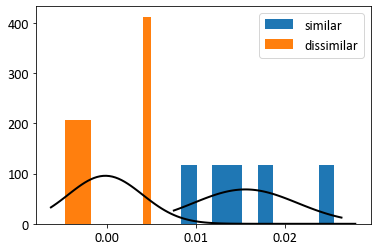

In [38]:
from scipy.stats import norm

mu, std = norm.fit(sim_intensities)

plt.hist(sim_intensities, density=True, label='similar')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#plt.title(title)
mu, std = norm.fit(dis_intensities)

plt.hist(dis_intensities, density=True, label='dissimilar')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#plt.title(title)
plt.legend()

plt.show()

## REPEAT!

In [39]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
RHYTHM_TONE_RATIO = 0.7
NOISE_RATIO = 0.5

for _ in range(10):
    # create model
    model_both = Minerva2(FPT)
    model_none = Minerva2(FPT)
    model_tone = Minerva2(FPT)
    model_rhythm = Minerva2(FPT)
    # create probes
    Ps = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    PT_split_index = round(N_PROTOTYPES * NOISE_RATIO)

    # create traces (subset of probes)
    T_Rs = np.copy(Ps)[:PT_split_index]
    T_Ts = np.copy(Ps)[:PT_split_index]

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * RHYTHM_TONE_RATIO)

    T_Rs[:, :RT_split_index] *= 0
    T_Ts[:, RT_split_index:] *= 0

    # add traces to model
    for T_R in T_Rs:
        model_both.add_trace(T_R)
        model_rhythm.add_trace(T_R)
    for T_T in T_Ts:
        model_both.add_trace(T_T)
        model_tone.add_trace(T_T)
        
    for rand_trace in np.random.randint(-1, 2, (round(N_PROTOTYPES * NOISE_RATIO), FPT)):
        model_none.add_trace(rand_trace)

    # get echo intensities
    sim_intensities_none = []
    sim_intensities_both = []
    sim_intensities_tone = []
    sim_intensities_rhythm = []
    dis_intensities_none = []
    dis_intensities_both = []
    dis_intensities_tone = []
    dis_intensities_rhythm = []
    for i, P in enumerate(Ps):
        intensity_none = model_none.get_echo_intensity(P)
        intensity_both = model_both.get_echo_intensity(P)
        intensity_tone = model_tone.get_echo_intensity(P)
        intensity_rhythm = model_rhythm.get_echo_intensity(P)
        if i < PT_split_index:
            sim_intensities_none.append(intensity_none)
            sim_intensities_both.append(intensity_both)
            sim_intensities_tone.append(intensity_tone)
            sim_intensities_rhythm.append(intensity_rhythm)
        else:
            dis_intensities_none.append(intensity_none)
            dis_intensities_both.append(intensity_both)
            dis_intensities_tone.append(intensity_tone)
            dis_intensities_rhythm.append(intensity_rhythm)

    ax, fig = plt.subplots((1, 1))
    # plot histograms and normal PDFs
    show_densities(sim_intensities_none, dis_intensities_none, 'No overlap')
    show_densities(sim_intensities_both, dis_intensities_both, 'Tone and Rhythm overlap')
    show_densities(sim_intensities_tone, dis_intensities_tone, 'Tone only overlap')
    show_densities(sim_intensities_rhythm, dis_intensities_rhythm, 'Rhythm only overlap')

    plt.figure(figsize=(14,7))

    mu1, std1 = norm.fit(a)
    mu2, std2 = norm.fit(b)

    ax.hist(a, density=True, label='similar')
    ax.hist(b, density=True, label='dissimilar')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p1 = norm.pdf(x, mu1, std1)
    ax.plot(x, p1, 'k',linewidth=2, label='$\mu$ = %.2e, $\sigma$ = %.2e' % (mu1, std1))

    p2 = norm.pdf(x, mu2, std2)
    ax.plot(x, p2, 'b', linewidth=2, label='$\mu$ = %.2e, $\sigma$ = %.2e' % (mu2, std2))

    plt.title(title + " - Intensity as a function of similarity (histogram, and PDFs)")
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    break

TypeError: 'tuple' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

1. remove unstudied
2. add rhythm only
3. add tone only
4. add noise to everything
5. single studied vs multiple studied

# Round 2!

In [ ]:
# tunable variables
FPT = 100
N_PROTOTYPES = 100
TONE_RHYTHM_RATIO = 0.7

# create model
model = Minerva2(FPT)
# create probes
Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

In [ ]:
# create traces (subset of probes)
T_Rs = np.copy(Ps_rhythm)
T_Ts = np.copy(Ps_tone)
T_Bs = Ps_both

In [ ]:
# zero out parts of traces (symmetrically)
RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

In [ ]:
# add traces to model
for T_R in T_Rs:
    model.add_trace(T_R)
for T_T in T_Ts:
    model.add_trace(T_T)
for T_B in T_Bs:
    model.add_trace(T_B)

In [ ]:
# Add random noise traces
#     for rand_trace in np.random.randint(-1, 2, (round(N_PROTOTYPES * NOISE_RATIO), FPT)):
#         model.add_trace(rand_trace)

# get echo intensities
tone_intensities = [model.get_echo_intensity(p) for p in Ps_tone]
rhythm_intensities = [model.get_echo_intensity(p) for p in Ps_rhythm]
both_intensities = [model.get_echo_intensity(p) for p in Ps_both]
unstudied_intensities = [model.get_echo_intensity(p) for p in Ps_unstudied]

In [ ]:
plt.plot(tone_intensities)

In [ ]:
model2 = Minerva2(FPT)

In [ ]:
# add traces to model
model2.add_traces(T_Rs)
model2.add_traces(T_Ts)
model2.add_traces(T_Bs)

In [ ]:
model_arr = np.array(model.model)
similarities = (Ps_tone @ model_arr.T)/Ps_tone.shape[1]
activations = similarities**3
intensities = np.mean(activations, axis=1)
plt.plot(intensities)

In [ ]:
# plot histograms and normal PDFs
plt.figure(figsize=(14,7))

mu_tone, std_tone = norm.fit(tone_intensities)
mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
mu_both, std_both = norm.fit(both_intensities)
mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

In [ ]:
plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
plt.hist(tone_intensities, color='b', density=True)
plt.hist(rhythm_intensities, color='g', density=True)
plt.hist(both_intensities, color='r', density=True)

In [ ]:
#plt.xlim(-1e-4, .001)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)

p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
plt.plot(x, p_unstudied, 'k',linewidth=4)
plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

p_tone = norm.pdf(x, mu_tone, std_tone)
plt.plot(x, p_tone, 'k',linewidth=4)
plt.plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_tone, std_tone))

p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
plt.plot(x, p_rhythm, 'k',linewidth=4)
plt.plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_rhythm, std_rhythm))

p_both = norm.pdf(x, mu_both, std_both)
plt.plot(x, p_both, 'k',linewidth=4)
plt.plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_both, std_both))

plt.title(title + " - Intensity as a function of similarity (histogram, and PDFs)")
plt.legend()
plt.xlabel("Echo Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()

## Slower!

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 100
TONE_RHYTHM_RATIO = 0.7

# create model
model = Minerva2(FPT)
# create probes
Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

# create traces (subset of probes)
T_Rs = np.copy(Ps_rhythm)
T_Ts = np.copy(Ps_tone)
T_Bs = Ps_both

# zero out parts of traces (symmetrically)
RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

# add traces to model

model.add_traces(T_Rs)
model.add_traces(T_Ts)
model.add_traces(T_Bs)

# get echo intensities
tone_intensities = [model.get_echo_intensity(p) for p in Ps_tone]
rhythm_intensities = [model.get_echo_intensity(p) for p in Ps_rhythm]
both_intensities = [model.get_echo_intensity(p) for p in Ps_both]
unstudied_intensities = [model.get_echo_intensity(p) for p in Ps_unstudied]

# plot histograms and normal PDFs
plt.figure(figsize=(14,7))

mu_tone, std_tone = norm.fit(tone_intensities)
mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
mu_both, std_both = norm.fit(both_intensities)
mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
plt.hist(tone_intensities, color='b', density=True)
plt.hist(rhythm_intensities, color='g', density=True)
plt.hist(both_intensities, color='r', density=True)

#plt.xlim(-1e-4, .001)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)

p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
plt.plot(x, p_unstudied, 'k',linewidth=4)
plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

p_tone = norm.pdf(x, mu_tone, std_tone)
plt.plot(x, p_tone, 'k',linewidth=4)
plt.plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_tone, std_tone))

p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
plt.plot(x, p_rhythm, 'k',linewidth=4)
plt.plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_rhythm, std_rhythm))

p_both = norm.pdf(x, mu_both, std_both)
plt.plot(x, p_both, 'k',linewidth=4)
plt.plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_both, std_both))

plt.title(title + " - Intensity as a function of similarity (histogram, and PDFs)")
plt.legend()
plt.xlabel("Echo Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()

labels = ['U','T','R','B']
results = [unstudied_intensities, tone_intensities, rhythm_intensities, both_intensities]
print('_,U,T,R,B')
for i, row in enumerate(results):
    print(labels[i], end=',')
    for col in results:
        print(ttest_ind(row, col).pvalue, end=',')
    print()

## Faster!

## Vary tone/rhythm ratio

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
#TONE_RHYTHM_RATIO = 0.7

for TONE_RHYTHM_RATIO in [0.5, 0.6, 0.7, 0.8, 0.9]:
    # create model
    model = Minerva2(FPT)

    # create probes
    Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

    # create traces (subset of probes)
    T_Rs = np.copy(Ps_rhythm)
    T_Ts = np.copy(Ps_tone)
    T_B_Rs = np.copy(Ps_both)
    T_B_Ts = np.copy(Ps_both)

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

    T_Rs[:, :RT_split_index] *= 0
    T_Ts[:, RT_split_index:] *= 0
    T_B_Rs[:, RT_split_index:] *= 0
    T_B_Ts[:, :RT_split_index] *= 0

    # add traces to model
    model.add_traces(T_Rs)
    model.add_traces(T_Ts)
    model.add_traces(T_B_Rs)
    model.add_traces(T_B_Ts)

    # get echo intensities
    tone_intensities = model.get_echo_intensities(Ps_tone)
    rhythm_intensities = model.get_echo_intensities(Ps_rhythm)
    both_intensities = model.get_echo_intensities(Ps_both)
    unstudied_intensities = model.get_echo_intensities(Ps_unstudied)

    # plot histograms and normal PDFs
    plt.figure(figsize=(14,7))

    mu_tone, std_tone = norm.fit(tone_intensities)
    mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
    mu_both, std_both = norm.fit(both_intensities)
    mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

    plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
    plt.hist(tone_intensities, color='b', density=True)
    plt.hist(rhythm_intensities, color='g', density=True)
    plt.hist(both_intensities, color='r', density=True)
    #plt.xlim(-1e-4, .001)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
    plt.plot(x, p_unstudied, 'k',linewidth=4)
    plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

    p_tone = norm.pdf(x, mu_tone, std_tone)
    plt.plot(x, p_tone, 'k',linewidth=4)
    plt.plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_tone, std_tone))

    p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
    plt.plot(x, p_rhythm, 'k',linewidth=4)
    plt.plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_rhythm, std_rhythm))

    p_both = norm.pdf(x, mu_both, std_both)
    plt.plot(x, p_both, 'k',linewidth=4)
    plt.plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_both, std_both))

    plt.title("Rhythm/tone ratio {} - Intensity as a function of similarity (histogram, and PDFs)".format(TONE_RHYTHM_RATIO))
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    
    labels = ['U','T','R','B']
    results = [unstudied_intensities, tone_intensities, rhythm_intensities, both_intensities]
    print('_,U,T,R,B')
    for i, row in enumerate(results):
        print(labels[i], end=',')
        for col in results:
            print(ttest_ind(row, col).pvalue, end=',')
        print()

## Vary noise ratio

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
TONE_RHYTHM_RATIO = 0.7

for NOISE_RATIO in [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]:
    # create model
    model = Minerva2(FPT)

    # create probes
    Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

    # create traces (subset of probes)
    T_Rs = np.copy(Ps_rhythm)
    T_Ts = np.copy(Ps_tone)
    T_B_Rs = np.copy(Ps_both)
    T_B_Ts = np.copy(Ps_both)

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

    T_Rs[:, :RT_split_index] *= 0
    T_Ts[:, RT_split_index:] *= 0
    T_B_Rs[:, RT_split_index:] *= 0
    T_B_Ts[:, :RT_split_index] *= 0
    
    # flip some features (add noise)
    T_Rs = add_noise_2d(T_Rs, NOISE_RATIO)
    T_Ts = add_noise_2d(T_Ts, NOISE_RATIO)
    T_B_Rs = add_noise_2d(T_B_Rs, NOISE_RATIO)
    T_B_Ts = add_noise_2d(T_B_Ts, NOISE_RATIO)

    # add traces to model
    model.add_traces(T_Rs)
    model.add_traces(T_Ts)
    model.add_traces(T_B_Rs)
    model.add_traces(T_B_Ts)

    # get echo intensities
    tone_intensities = model.get_echo_intensities(Ps_tone)
    rhythm_intensities = model.get_echo_intensities(Ps_rhythm)
    both_intensities = model.get_echo_intensities(Ps_both)
    unstudied_intensities = model.get_echo_intensities(Ps_unstudied)

    # plot histograms and normal PDFs
    plt.figure(figsize=(14,7))

    mu_tone, std_tone = norm.fit(tone_intensities)
    mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
    mu_both, std_both = norm.fit(both_intensities)
    mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

    plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
    plt.hist(tone_intensities, color='b', density=True)
    plt.hist(rhythm_intensities, color='g', density=True)
    plt.hist(both_intensities, color='r', density=True)
    #plt.xlim(-1e-4, .001)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
    plt.plot(x, p_unstudied, 'k',linewidth=4)
    plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

    p_tone = norm.pdf(x, mu_tone, std_tone)
    plt.plot(x, p_tone, 'k',linewidth=4)
    plt.plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_tone, std_tone))

    p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
    plt.plot(x, p_rhythm, 'k',linewidth=4)
    plt.plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_rhythm, std_rhythm))

    p_both = norm.pdf(x, mu_both, std_both)
    plt.plot(x, p_both, 'k',linewidth=4)
    plt.plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_both, std_both))

    plt.title("Noise ratio {} - Intensity as a function of similarity (histogram, and PDFs)".format(NOISE_RATIO))
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    
    labels = ['U','T','R','B']
    results = [unstudied_intensities, tone_intensities, rhythm_intensities, both_intensities]
    print('_,U,T,R,B')
    for i, row in enumerate(results):
        print(labels[i], end=',')
        for col in results:
            print(ttest_ind(row, col).pvalue, end=',')
        print()

## Vary multiple (export this)

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 30

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.set_figheight(16)
fig.set_figwidth(16)
fig.suptitle("Echo intensity as a function of feature type")

for i, TONE_RHYTHM_RATIO in enumerate([.5, .6, .7]):
    for j, NOISE_RATIO in enumerate([0.01, 0.1, 0.2]):
        tone_intensities = []
        rhythm_intensities = []
        both_intensities = []
        unstudied_intensities = []
        for _ in range(120):
            # create model
            model = Minerva2(FPT)

            # create probes
            Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
            Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
            Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
            Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

            # create traces (subset of probes)
            T_Rs = np.copy(Ps_rhythm)
            T_Ts = np.copy(Ps_tone)
            T_B_Rs = np.copy(Ps_both)
            T_B_Ts = np.copy(Ps_both)

            # zero out parts of traces (symmetrically)
            RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

            T_Rs[:, :RT_split_index] *= 0
            T_Ts[:, RT_split_index:] *= 0
            T_B_Rs[:, RT_split_index:] *= 0
            T_B_Ts[:, :RT_split_index] *= 0

            # flip some features (add noise)
            T_Rs = add_noise_2d(T_Rs, NOISE_RATIO)
            T_Ts = add_noise_2d(T_Ts, NOISE_RATIO)
            T_B_Rs = add_noise_2d(T_B_Rs, NOISE_RATIO)
            T_B_Ts = add_noise_2d(T_B_Ts, NOISE_RATIO)

            # add traces to model
            model.add_traces(T_Rs)
            model.add_traces(T_Ts)
            model.add_traces(T_B_Rs)
            model.add_traces(T_B_Ts)

            # get echo intensities
            tone_intensities.extend(model.get_echo_intensities(Ps_tone))
            rhythm_intensities.extend(model.get_echo_intensities(Ps_rhythm))
            both_intensities.extend(model.get_echo_intensities(Ps_both))
            unstudied_intensities.extend(model.get_echo_intensities(Ps_unstudied))

        # plot histograms and normal PDFs
        mu_tone, std_tone = norm.fit(tone_intensities)
        mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
        mu_both, std_both = norm.fit(both_intensities)
        mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

        print(i, j)
        axs[i, j].hist(unstudied_intensities, color='xkcd:orange', density=True)
        axs[i, j].hist(tone_intensities, color='b', density=True)
        axs[i, j].hist(rhythm_intensities, color='g', density=True)
        axs[i, j].hist(both_intensities, color='r', density=True)
        #plt.xlim(-1e-4, .001)
        xmin, xmax = axs[i, j].set_xlim(-1e-4, .001)
        x = np.linspace(xmin, xmax, 10000)
        axs[i, j].set_ylim(0, 60000)

        p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
        axs[i, j].plot(x, p_unstudied, 'k',linewidth=4)
        axs[i, j].plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = {:.1e}, $\sigma$ = {:.1e}'.format(mu_unstudied, std_unstudied))

        p_tone = norm.pdf(x, mu_tone, std_tone)
        axs[i, j].plot(x, p_tone, 'k',linewidth=4)
        axs[i, j].plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = {:.1e}, $\sigma$ = {:.1e}'.format(mu_tone, std_tone))

        p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
        axs[i, j].plot(x, p_rhythm, 'k',linewidth=4)
        axs[i, j].plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = {:.1e}, $\sigma$ = {:.1e}'.format(mu_rhythm, std_rhythm))

        p_both = norm.pdf(x, mu_both, std_both)
        axs[i, j].plot(x, p_both, 'k',linewidth=4)
        axs[i, j].plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = {:.1e}, $\sigma$ = {:.1e}'.format(mu_both, std_both))

        axs[i, j].set_title("Noise ratio={}, R/T ratio={}".format(NOISE_RATIO, TONE_RHYTHM_RATIO))
        axs[i, j].set_xlabel("Echo Intensity")
        axs[i, j].set_ylabel("Density")
        axs[i, j].grid(True)
        axs[i, j].legend(loc=1, prop={'size':13.5})
        axs[i, j].label_outer()
        
        with open("Simulations_TR_Output_{}_{}.csv".format(i,j),"w") as potato:
            potato.write("unstudied,tone,rhythm,both\n")
            for u,t,r,b in zip(unstudied_intensities, tone_intensities, rhythm_intensities, both_intensities):
                #potato.write(str(u)+str(t)+str(r)+str(b)+"\n")
                potato.write('{},{},{},{}\n'.format(u,t,r,b))
                
        labels = ['U','T','R','B']
        results = [unstudied_intensities, tone_intensities, rhythm_intensities, both_intensities]
        print('_,U,T,R,B')
        for k, row in enumerate(results):
            print(labels[k], end=',')
            for col in results:
                print(ttest_ind(row, col).pvalue, end=',')
            print()
            

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


# Repetition experiment

## Vary tone/rhythm ratio

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
TONE_RHYTHM_RATIO = 0.7
NOISE_RATIO = 0.1
N = 3

for TONE_RHYTHM_RATIO in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
#for NOISE_RATIO in [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]:
    # create model
    model = Minerva2(FPT)

    # create probes
    Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythm1 = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythmN = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

    # create traces (subset of probes)
    T_1s = np.copy(Ps_rhythm1)
    T_Ns = np.copy(Ps_rhythmN)

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

    T_1s[:, :RT_split_index] *= 0
    T_Ns[:, :RT_split_index] *= 0
    
    # flip some features (add noise)
    T_1s = add_noise_2d(T_1s, NOISE_RATIO)
    T_Ns = add_noise_2d(T_Ns, NOISE_RATIO)

    # add traces to model
    model.add_traces(T_1s)
    for _ in range(N):
        model.add_traces(T_Ns)

    # get echo intensities
    R1_intensities = model.get_echo_intensities(Ps_rhythm1)
    RN_intensities = model.get_echo_intensities(Ps_rhythmN)
    unstudied_intensities = model.get_echo_intensities(Ps_unstudied)

    # plot histograms and normal PDFs
    plt.figure(figsize=(14,7))

    mu_1, std_1 = norm.fit(R1_intensities)
    mu_N, std_N = norm.fit(RN_intensities)
    mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

    plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
    plt.hist(R1_intensities, color='b', density=True)
    plt.hist(RN_intensities, color='g', density=True)
    #plt.xlim(-1e-4, .001)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
    plt.plot(x, p_unstudied, 'k',linewidth=4)
    plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

    p_1 = norm.pdf(x, mu_1, std_1)
    plt.plot(x, p_1, 'k',linewidth=4)
    plt.plot(x, p_1, 'b',linewidth=2, label='N=1: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_1, std_1))

    p_N = norm.pdf(x, mu_N, std_N)
    plt.plot(x, p_N, 'k',linewidth=4)
    plt.plot(x, p_N, 'g',linewidth=2, label='N=%d: $\mu$ = %.2e, $\sigma$ = %.2e' % (N, mu_N, std_N))

    plt.title("Noise ratio {}, R/T ratio {}, N={} - Intensity as a function of similarity (histogram, and PDFs)".format(NOISE_RATIO, TONE_RHYTHM_RATIO, N))
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    
    labels = ['U','1','N']
    results = [unstudied_intensities, R1_intensities, RN_intensities]
    print('_,U,1,N')
    for i, row in enumerate(results):
        print(labels[i], end=',')
        for col in results:
            print(ttest_ind(row, col).pvalue, end=',')
        print()

## Vary noise ratio

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
TONE_RHYTHM_RATIO = 0.7
NOISE_RATIO = 0.1
N = 3

#for TONE_RHYTHM_RATIO in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
for NOISE_RATIO in [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]:
    # create model
    model = Minerva2(FPT)

    # create probes
    Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythm1 = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythmN = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

    # create traces (subset of probes)
    T_1s = np.copy(Ps_rhythm1)
    T_Ns = np.copy(Ps_rhythmN)

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

    T_1s[:, :RT_split_index] *= 0
    T_Ns[:, :RT_split_index] *= 0
    
    # flip some features (add noise)
    T_1s = add_noise_2d(T_1s, NOISE_RATIO)
    T_Ns = add_noise_2d(T_Ns, NOISE_RATIO)

    # add traces to model
    model.add_traces(T_1s)
    for _ in range(N):
        model.add_traces(T_Ns)

    # get echo intensities
    R1_intensities = model.get_echo_intensities(Ps_rhythm1)
    RN_intensities = model.get_echo_intensities(Ps_rhythmN)
    unstudied_intensities = model.get_echo_intensities(Ps_unstudied)

    # plot histograms and normal PDFs
    plt.figure(figsize=(14,7))

    mu_1, std_1 = norm.fit(R1_intensities)
    mu_N, std_N = norm.fit(RN_intensities)
    mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

    plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
    plt.hist(R1_intensities, color='b', density=True)
    plt.hist(RN_intensities, color='g', density=True)
    #plt.xlim(-1e-4, .001)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
    plt.plot(x, p_unstudied, 'k',linewidth=4)
    plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

    p_1 = norm.pdf(x, mu_1, std_1)
    plt.plot(x, p_1, 'k',linewidth=4)
    plt.plot(x, p_1, 'b',linewidth=2, label='N=1: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_1, std_1))

    p_N = norm.pdf(x, mu_N, std_N)
    plt.plot(x, p_N, 'k',linewidth=4)
    plt.plot(x, p_N, 'g',linewidth=2, label='N=%d: $\mu$ = %.2e, $\sigma$ = %.2e' % (N, mu_N, std_N))

    plt.title("Noise ratio {}, R/T ratio {}, N={} - Intensity as a function of similarity (histogram, and PDFs)".format(NOISE_RATIO, TONE_RHYTHM_RATIO, N))
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    
    labels = ['U','1','N']
    results = [unstudied_intensities, R1_intensities, RN_intensities]
    print('_,U,1,N')
    for i, row in enumerate(results):
        print(labels[i], end=',')
        for col in results:
            print(ttest_ind(row, col).pvalue, end=',')
        print()

## Vary N

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
TONE_RHYTHM_RATIO = 0.7
NOISE_RATIO = 0.1
N = 3

for N in [2, 3, 4, 5, 6]:
    # create model
    model = Minerva2(FPT)

    # create probes
    Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythm1 = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    Ps_rhythmN = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

    # create traces (subset of probes)
    T_1s = np.copy(Ps_rhythm1)
    T_Ns = np.copy(Ps_rhythmN)

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

    T_1s[:, :RT_split_index] *= 0
    T_Ns[:, :RT_split_index] *= 0
    
    # flip some features (add noise)
    T_1s = add_noise_2d(T_1s, NOISE_RATIO)
    T_Ns = add_noise_2d(T_Ns, NOISE_RATIO)

    # add traces to model
    model.add_traces(T_1s)
    for _ in range(N):
        model.add_traces(T_Ns)

    # get echo intensities
    R1_intensities = model.get_echo_intensities(Ps_rhythm1)
    RN_intensities = model.get_echo_intensities(Ps_rhythmN)
    unstudied_intensities = model.get_echo_intensities(Ps_unstudied)

    # plot histograms and normal PDFs
    plt.figure(figsize=(14,7))

    mu_1, std_1 = norm.fit(R1_intensities)
    mu_N, std_N = norm.fit(RN_intensities)
    mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

    plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
    plt.hist(R1_intensities, color='b', density=True)
    plt.hist(RN_intensities, color='g', density=True)
    #plt.xlim(-1e-4, .001)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
    plt.plot(x, p_unstudied, 'k',linewidth=4)
    plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

    p_1 = norm.pdf(x, mu_1, std_1)
    plt.plot(x, p_1, 'k',linewidth=4)
    plt.plot(x, p_1, 'b',linewidth=2, label='N=1: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_1, std_1))

    p_N = norm.pdf(x, mu_N, std_N)
    plt.plot(x, p_N, 'k',linewidth=4)
    plt.plot(x, p_N, 'g',linewidth=2, label='N=%d: $\mu$ = %.2e, $\sigma$ = %.2e' % (N, mu_N, std_N))

    plt.title("Noise ratio {}, R/T ratio {}, N={} - Intensity as a function of similarity (histogram, and PDFs)".format(NOISE_RATIO, TONE_RHYTHM_RATIO, N))
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    
    labels = ['U','1','N']
    results = [unstudied_intensities, R1_intensities, RN_intensities]
    print('_,U,1,N')
    for i, row in enumerate(results):
        print(labels[i], end=',')
        for col in results:
            print(ttest_ind(row, col).pvalue, end=',')
        print()

## Vary Multiple (export this)

In [ ]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 40
N=3

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.set_figheight(16)
fig.set_figwidth(16)
fig.suptitle("Echo intensity as a function of repetition")

for i, TONE_RHYTHM_RATIO in enumerate([.5, .6, .7]):
    for j, NOISE_RATIO in enumerate([0.01, 0.1, 0.2]):
        print(i, j)
        R1_intensities = []
        RN_intensities = []
        unstudied_intensities = []
        for _ in range(120):
            model = Minerva2(FPT)

            # create probes
            Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
            Ps_rhythm1 = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
            Ps_rhythmN = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

            # create traces (subset of probes)
            T_1s = np.copy(Ps_rhythm1)
            T_Ns = np.copy(Ps_rhythmN)

            # zero out parts of traces (symmetrically)
            RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

            T_1s[:, :RT_split_index] *= 0
            T_Ns[:, :RT_split_index] *= 0

            # flip some features (add noise)
            T_1s = add_noise_2d(T_1s, NOISE_RATIO)
            T_Ns = add_noise_2d(T_Ns, NOISE_RATIO)

            # add traces to model
            model.add_traces(T_1s)
            for _ in range(N):
                model.add_traces(T_Ns)

            # get echo intensities
            R1_intensities.extend(model.get_echo_intensities(Ps_rhythm1))
            RN_intensities.extend(model.get_echo_intensities(Ps_rhythmN))
            unstudied_intensities.extend(model.get_echo_intensities(Ps_unstudied))

        # plot histograms and normal PDFs
        mu_1, std_1 = norm.fit(R1_intensities)
        mu_N, std_N = norm.fit(RN_intensities)
        mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

        axs[i, j].hist(unstudied_intensities, color='xkcd:orange', density=True)
        axs[i, j].hist(R1_intensities, color='b', density=True)
        axs[i, j].hist(RN_intensities, color='g', density=True)
        x = np.linspace(xmin, xmax, 10000)
        xmin, xmax = axs[i, j].set_xlim(-1e-4, .0012)
        axs[i, j].set_ylim(0, 90000)

        p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
        axs[i, j].plot(x, p_unstudied, 'k',linewidth=4)
        axs[i, j].plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = {:.1e}, $\sigma$ = {:.1e}'.format(mu_unstudied, std_unstudied))

        p_1 = norm.pdf(x, mu_1, std_1)
        axs[i, j].plot(x, p_1, 'k',linewidth=4)
        axs[i, j].plot(x, p_1, 'b',linewidth=2, label='N=1: $\mu$ = {:.1e}, $\sigma$ = {:.1e}'.format(mu_1, std_1))

        p_N = norm.pdf(x, mu_N, std_N)
        axs[i, j].plot(x, p_N, 'k',linewidth=4)
        axs[i, j].plot(x, p_N, 'g',linewidth=2, label='N=3: $\mu$ = {:.1e}, $\sigma$ = {:.1e}'.format(mu_N, std_N))

        axs[i, j].set_title("Noise ratio={}, R/T ratio={}".format(NOISE_RATIO, TONE_RHYTHM_RATIO))
        axs[i, j].set_xlabel("Echo Intensity")
        axs[i, j].set_ylabel("Density")
        axs[i, j].grid(True)
        axs[i, j].legend(loc=1, prop={'size':13.5})
        axs[i, j].label_outer()
        
        with open("Simulations_Repetition_Output_{}_{}.csv".format(i,j),"w") as potato:
            potato.write("unstudied,r1,r3\n")
            for u,r1,r3 in zip(unstudied_intensities, R1_intensities, RN_intensities):
                potato.write('{},{},{}\n'.format(u,r1,r3))  
                
        labels = ['U','1','N']
        results = [unstudied_intensities, R1_intensities, RN_intensities]
        print('_,U,1,N')
        for k, row in enumerate(results):
            print(labels[k], end=',')
            for col in results:
                print(ttest_ind(row, col).pvalue, end=',')
            print()
            

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()
